In [36]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

In [37]:
def IdentificaARX(u, y, na, nb, nk):
    n_max =  max(na, nb, nk)
    N = len(y)

    # Matriz de regressão: Mx = Y
    Y = y[n_max:]
    M = []

    for i in range(n_max, N):
        regressor = []
        for j in range(1,na+1):
            regressor.append(-y[i-j])
        for j in range(1, nb+1):
            regressor.append(u[i-nk-j])
        M.append(regressor)

    M = np.array(M)

    theta = np.linalg.lstsq(M,Y, rcond = None)[0]

    a_coef = np.concatenate(([1], theta[:na]))
    b_coef = np.concatenate((np.zeros(nk+1), theta[na:]))

    return a_coef, b_coef

In [38]:
# Carregar os dados:

dados = np.load("DadosMG.npy")
tm = dados[:,2]
Ts = np.mean(tm)
um = dados[150:,1]
ym = dados[150:,0]

mu_u = np.mean(um)
mu_y = np.mean(ym)

u = um - mu_u
y = ym - mu_y

In [39]:
dados

array([[0.02102757, 6.5       , 0.        ],
       [0.02107024, 6.5       , 0.        ],
       [0.02109861, 6.5       , 0.        ],
       ...,
       [0.02134657, 6.5       , 0.        ],
       [0.02123713, 6.5       , 0.        ],
       [0.02090001, 6.5       , 0.        ]], shape=(800, 3))

In [40]:
ym

array([0.02072597, 0.02104998, 0.02110672, 0.02074218, 0.02106786,
       0.02067733, 0.02059269, 0.02078176, 0.02089834, 0.02086115,
       0.02113438, 0.02096605, 0.02095532, 0.02138257, 0.02154613,
       0.02123833, 0.02121997, 0.02122998, 0.02110147, 0.02133203,
       0.02132201, 0.02128601, 0.02134752, 0.02120614, 0.02114129,
       0.02053213, 0.02108526, 0.02082276, 0.02097487, 0.02127242,
       0.0212028 , 0.02134299, 0.02120113, 0.02153397, 0.02180386,
       0.02131152, 0.02209568, 0.02140069, 0.02100801, 0.02136755,
       0.02186131, 0.0215652 , 0.02137709, 0.02191591, 0.02113438,
       0.02098298, 0.02175307, 0.02152061, 0.02107   , 0.02105761,
       0.02132559, 0.02079988, 0.0208559 , 0.02090907, 0.02178669,
       0.02164125, 0.02077794, 0.02101564, 0.02131224, 0.02082992,
       0.0208776 , 0.02114701, 0.02151608, 0.02091098, 0.02112722,
       0.02232766, 0.02085757, 0.02080011, 0.02133369, 0.02137232,
       0.02100706, 0.02112031, 0.02110791, 0.02060366, 0.02102

In [51]:
Ts = 20e-3

In [42]:
# IdentificaARX(u, y, na, nb, nk):
na = 2
nb = 2
nk = 0

a_coef, b_coef = IdentificaARX(u, y, na, nb, nk)

In [43]:
b_coef

array([0.00000000e+00, 6.47585979e-05, 7.77342443e-06])

In [44]:
a_coef

array([ 1.        , -0.09811774, -0.0905181 ])

In [52]:
Gz = ct.TransferFunction(b_coef,a_coef, Ts)
Gz

TransferFunction(array([6.47585979e-05, 7.77342443e-06]), array([ 1.        , -0.09811774, -0.0905181 ]), 0.02)

In [53]:
t = Ts*np.arange(0,len(u))

yp = ct.forced_response(Gz,T = t, U = u)[1]


In [54]:
# Converter para espaço de estados
Hss = ct.tf2ss(b_coef, a_coef, Ts)

x0 = y[:na] 

# Fazer a predição com condições iniciais
yp = ct.forced_response(Hss, T=t, U=u, X0=x0)[1]

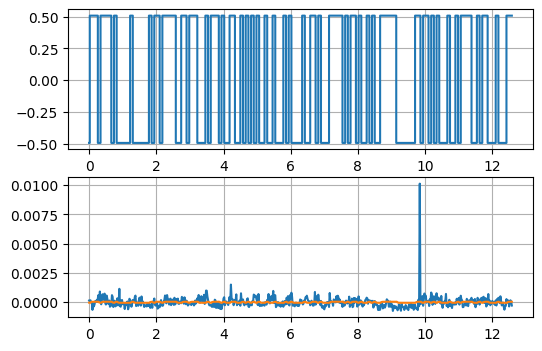

In [55]:
plt.figure(figsize = (6,4))
plt.subplot(211)
plt.step(t[:-20],u[20:])
plt.grid()
plt.subplot(212)
plt.plot(t[:-20],y[20:])
plt.plot(t[:-20],yp[20:])
plt.grid()
plt.show()


In [56]:
e = y[20:] - yp[20:]
fit = 100*(1 - np.linalg.norm(e)/np.linalg.norm(y) )
print('Ajuste: ', np.round(fit,2))

Ajuste:  0.94


In [50]:
# Salva os paramestros do modelo
DadosModelo = {
    'a_coef': a_coef,
    'b_coef': b_coef,
    'Ts': Ts,
    'na': na,
    'nb': nb,
    'mu_y': mu_y,
    'mu_u': mu_u
}

np.save('ParametrosModelo.npy', DadosModelo)

| $n_a$ | $n_b$ | $G(z)$ | $FIT$ |